In [53]:
import sys
import os
import importlib
import numpy as np

# widen printing output
np.set_printoptions(linewidth=1000)

project_root = os.path.abspath('..')  # or the absolute path to your project
if project_root not in sys.path:
    sys.path.append(project_root)

import game_utils
importlib.reload(game_utils)

from game_utils import kuhn, utils, LP, Strategy, CFR
importlib.reload(CFR)
importlib.reload(kuhn)
importlib.reload(utils)
importlib.reload(LP)
importlib.reload(Strategy)

MixedStrategy = Strategy.MixedStrategy
PureStrategy = Strategy.PureStrategy

print("Modules reloaded successfully!")

Modules reloaded successfully!


In [72]:
# Linear programming solve
def LP_Solve(game):
    payoffs = game.convert_to_normal()

    freqs1, value1 = LP.solve_normal_zero_sum(payoffs)
    freqs2, value2 = LP.solve_normal_zero_sum(payoffs, player=1)

    print("Value of the game: ", value1)

    nash_strat1 = MixedStrategy.from_normal_form(freqs1, 0, game)
    nash_strat2 = MixedStrategy.from_normal_form(freqs2, 1, game)

    utils.binaryStrategyHeatmap(nash_strat1 | nash_strat2, transpose=True, figsize=(14, 2), title="LP Nash EQ")
    return nash_strat1, nash_strat2

def CFR_solve(game, iters=10000):
    solver = CFR.CFRSolver(game)
    solver.train(iters)
    utils.binaryStrategyHeatmap(solver.get_strategy(0) | solver.get_strategy(1), transpose=True, figsize=(14, 2), title="CFR Nash EQ")
    return solver.get_strategy(0), solver.get_strategy(1)

Value of the game:  0.05555555555555554


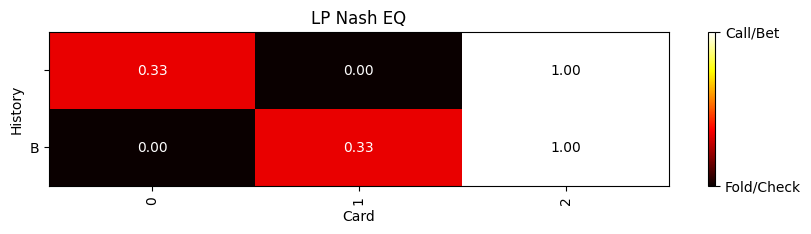

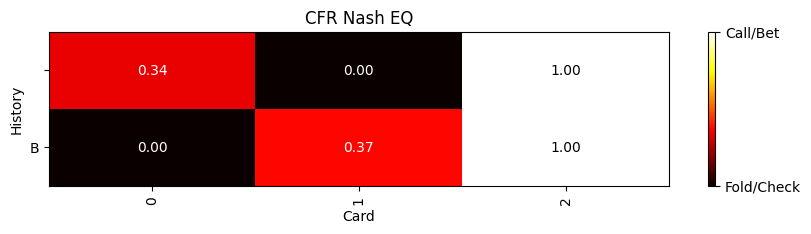

In [ ]:
LP_Solve(kuhn.ThreeCardNoCheck)
CFR_solve(kuhn.ThreeCardNoCheck)

Value of the game:  -0.05555555555555556


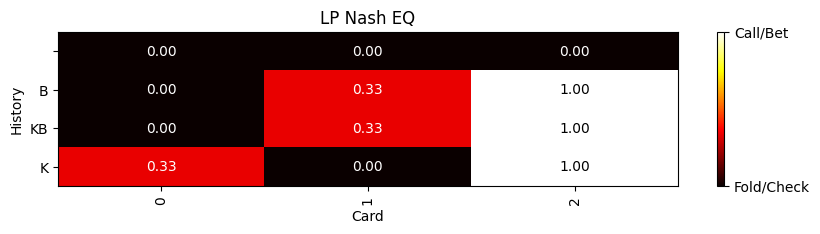

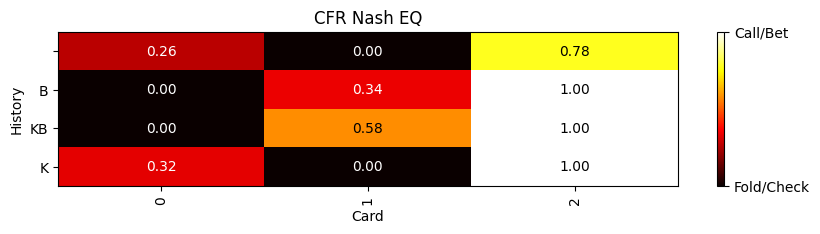

In [62]:
LP_nash1, LP_nash2 = LP_Solve(kuhn.ThreeCard)
CFR_nash1, CFR_nash2 = CFR_solve(kuhn.ThreeCard, iters=20000)

In [67]:
print(kuhn.ThreeCard.expected_payoff_approx(LP_nash1, LP_nash2))
print(kuhn.ThreeCard.expected_payoff_approx(CFR_nash1, CFR_nash2))
print(kuhn.ThreeCard.expected_payoff_approx(LP_nash1, CFR_nash2))
print(kuhn.ThreeCard.expected_payoff_approx(CFR_nash1, LP_nash2))
# all fairly close to the value of the game, so these could reasonably be considered nash equilibria

# https://en.wikipedia.org/wiki/Kuhn_poker
# both are differently parametrized versions of the analytical NEQ

-0.038
-0.096
-0.026
-0.012


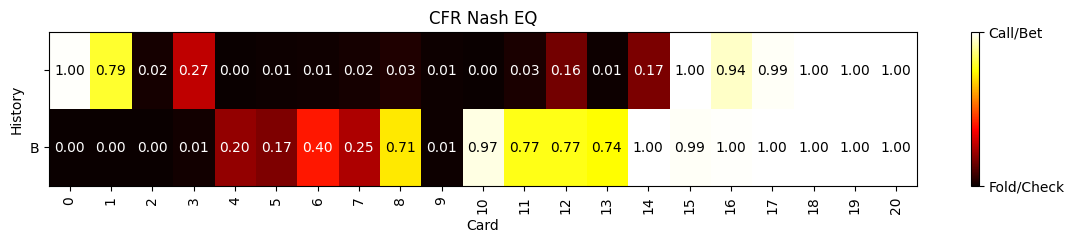

In [73]:
# LP_nash1, LP_nash2 = LP_Solve(kuhn.KuhnNoCheck.nCard(8))
CFR_nash1, CFR_nash2 = CFR_solve(kuhn.KuhnNoCheck.nCard(21), iters=20000)